In [2]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
oli = fetch_olivetti_faces()

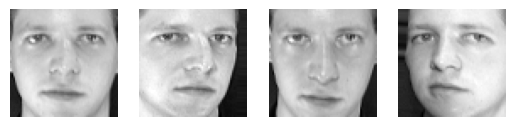

In [ ]:
# Veri setimiz 2D (64x64) -> 1D (4096) veriden oluşmaktadır.
# 40 farklı yüz görüntüsü içermektedir. Her biri için 10 farklı poz verilmiştir.

plt.figure()
for i in range(3):
    plt.subplot(1, 3, i + 1)
    plt.imshow(oli.images[i], cmap='gray')
    plt.axis('off')
plt.show()

In [5]:
X = oli.data
y = oli.target  

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=30) 
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, random_state=42)

In [68]:
y_pred = model.predict(X_test)

In [69]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy Score:", acc)

Accuracy Score: 0.9375


In [70]:
# Farklı hiperparametrelerle modelin doğruluk skorunu karşılaştırma
results = []
for n_estimators in [10, 50, 100, 200]:
    for max_depth in [None, 10, 20, 30]:
        model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.append((n_estimators, max_depth, acc))

for n_estimators, max_depth, acc in results:
    print(f'n_estimators={n_estimators}, max_depth={max_depth} -> Accuracy: {acc:.4f}')

n_estimators=10, max_depth=None -> Accuracy: 0.7000
n_estimators=10, max_depth=10 -> Accuracy: 0.4750
n_estimators=10, max_depth=20 -> Accuracy: 0.6125
n_estimators=10, max_depth=30 -> Accuracy: 0.6875
n_estimators=50, max_depth=None -> Accuracy: 0.8875
n_estimators=50, max_depth=10 -> Accuracy: 0.6625
n_estimators=50, max_depth=20 -> Accuracy: 0.8250
n_estimators=50, max_depth=30 -> Accuracy: 0.8750
n_estimators=100, max_depth=None -> Accuracy: 0.9375
n_estimators=100, max_depth=10 -> Accuracy: 0.7250
n_estimators=100, max_depth=20 -> Accuracy: 0.9125
n_estimators=100, max_depth=30 -> Accuracy: 0.9375
n_estimators=200, max_depth=None -> Accuracy: 0.9250
n_estimators=200, max_depth=10 -> Accuracy: 0.7375
n_estimators=200, max_depth=20 -> Accuracy: 0.9125
n_estimators=200, max_depth=30 -> Accuracy: 0.9125


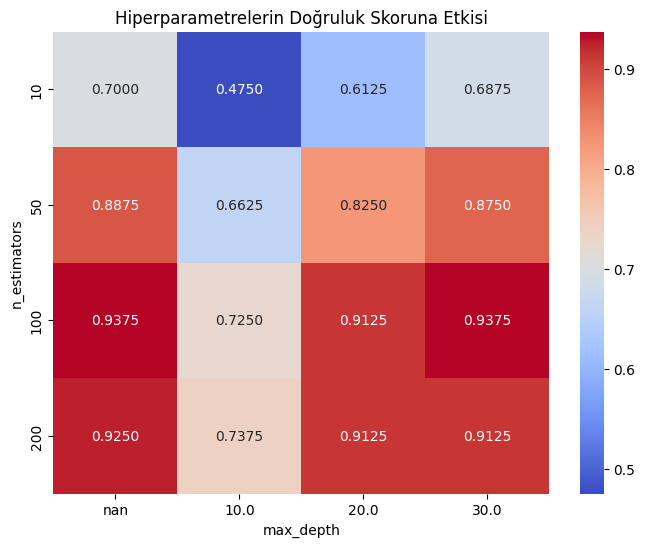

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(results, columns=['n_estimators', 'max_depth', 'accuracy'])

pivot = df.pivot(index='n_estimators', columns='max_depth', values='accuracy')
plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, fmt='.4f', cmap='coolwarm')  # Soft renkler için 'coolwarm', 'Blues', 'Pastel1' gibi haritalar kullanılabilir
plt.title('Hiperparametrelerin Doğruluk Skoruna Etkisi')
plt.ylabel('n_estimators')
plt.xlabel('max_depth')
plt.show()

### En Yüksek max_depth ve n_estimators Değerleri
- max_depth için en yüksek değer: 30 (veya None, sınırsız derinlik anlamına gelir)
- n_estimators için en yüksek değer: 200
 
**max_depth**: Bir ağacın maksimum derinliğini belirler. Derinlik arttıkça model daha karmaşık hale gelir, ancak aşırı derinlik aşırı öğrenmeye (overfitting) yol açabilir.
 
**n_estimators**: Ormanda bulunan ağaç sayısını belirtir. Ağaç sayısı arttıkça modelin genelleme yeteneği genellikle artar, ancak eğitim süresi de uzar.
 
Bu parametrelerin yüksek değerleri, modelin karmaşıklığını ve hesaplama maliyetini artırır. En iyi sonuçlar için genellikle bir denge bulunmalıdır.